In [1]:
import pandas as pd

data = pd.read_csv('repo_data.csv', index_col = False)
data

,actor_id,repo_id,repo_stargazers_count,repo_forks_count,pr_count
0,1,238039731,104.0,164.0,1.0
1,1,191051391,10436.0,435.0,1.0
2,4,328737293,10.0,2.0,4.0
3,4,411436787,0.0,0.0,0.0
4,4,384224123,0.0,0.0,1.0
...,...,...,...,...,...
55767969,96919257,443379870,0.0,0.0,0.0
55767970,96919258,443380077,0.0,0.0,0.0
55767971,96919283,443379926,0.0,0.0,0.0
55767972,96919285,443379970,0.0,0.0,0.0


In [2]:
data = data[~(data['repo_stargazers_count'].isin(['0.0']) & data['repo_forks_count'].isin(['0.0']) & data['pr_count'].isin(['0.0']))]
data

,actor_id,repo_id,repo_stargazers_count,repo_forks_count,pr_count
0,1,238039731,104.0,164.0,1.0
1,1,191051391,10436.0,435.0,1.0
2,4,328737293,10.0,2.0,4.0
4,4,384224123,0.0,0.0,1.0
5,4,186024298,16770.0,773.0,1.0
...,...,...,...,...,...
55767176,96916391,443360692,0.0,1.0,1.0
55767529,96917497,443368801,0.0,0.0,1.0
55767545,96917556,443368969,0.0,1.0,1.0
55767673,96918011,443375019,0.0,0.0,1.0


In [44]:
data = data.groupby('actor_id').sum()['pr_count'].reset_index(name = 'pr_sum')

In [3]:
pr_sum = data.groupby('actor_id').sum()['pr_count'].reset_index(name = 'pr_sum')
pr_sum = pr_sum.iloc[pr_sum['pr_sum'].argsort()[::-1]]
pr_sum

,actor_id,pr_sum
1002784,49699333,6153313.0
350474,10810283,783231.0
677202,31301654,139016.0
842909,41898282,106599.0
644390,29139614,72989.0
...,...,...
846138,42128471,1.0
846139,42128593,1.0
846140,42128680,1.0
1614678,77839554,1.0


In [4]:
star_sum = data.groupby('actor_id').sum()['repo_stargazers_count'].reset_index(name = 'star_sum')
star_sum = star_sum.iloc[star_sum['star_sum'].argsort()[::-1]]
star_sum

,actor_id,star_sum
1002784,49699333,42511029.0
842909,41898282,8012973.0
627773,27856297,4569029.0
644390,29139614,3412455.0
249867,6422482,1154797.0
...,...,...
1384110,68881821,0.0
1384111,68881900,0.0
1384112,68882107,0.0
1384113,68882116,0.0


In [5]:
fork_sum = data.groupby('actor_id').sum()['repo_forks_count'].reset_index(name = 'fork_sum')
fork_sum = fork_sum.iloc[fork_sum['fork_sum'].argsort()[::-1]]
fork_sum

,actor_id,fork_sum
1002784,49699333,10737117.0
842909,41898282,1523697.0
627773,27856297,960568.0
644390,29139614,613771.0
249867,6422482,224993.0
...,...,...
1342834,66802325,0.0
1342835,66802392,0.0
1342837,66802404,0.0
1342838,66802418,0.0


In [6]:
listtype = data['actor_id'].unique()

In [16]:
user_data_list = []
for i in range(len(listtype)):
    data0 = data[data['actor_id'].isin([listtype[i]])]
    this_user = []
    for index, row in data0.iterrows():
        this_user.append(row['repo_stargazers_count'])
    user_data_list.append(this_user)

In [17]:
f = open('user_repo_list.txt', 'w')
f.writelines(str(user_data_list))

In [38]:

def Hindx(data_list):
    temp = []
    temp = sorted(data_list, reverse = True)
    h = 0
    for i in temp:
        if i > h:
            h += 1
        else:
            return h
    return h



In [40]:
h_index = []
length = len(user_data_list)
for i in range(length):
    h_index.append(Hindx(user_data_list[i]))

In [46]:
data['star_sum'] = star_sum['star_sum']
data['fork_sum'] = fork_sum['fork_sum']
data['H_index'] = h_index

In [116]:
data

,actor_id,pr_sum,H_index,star_sum,fork_sum
0,1,2.0,2,10540.0,599.0
1,4,8.0,4,38883.0,5030.0
2,7,12.0,6,6654.0,518.0
3,17,4.0,3,3638.0,293.0
4,18,2.0,1,4.0,6.0
...,...,...,...,...,...
2134686,96916391,1.0,0,0.0,1.0
2134687,96917497,1.0,0,0.0,0.0
2134688,96917556,1.0,0,0.0,1.0
2134689,96918011,1.0,0,0.0,0.0


In [102]:
pagerank = []
with open("pagerank.txt", "r",encoding='utf-8') as f:
     for line in f.readlines():                    
        line = line.replace(')','').replace('(','').replace("'","").replace("'","")
        
        line = line.strip('\n').split(',')
        line[0] = int(line[0])
        line[1] = float(line[1])
        pagerank.append(line)


In [106]:
pagerank_df = pd.DataFrame(pagerank, columns = ['actor_id', 'pagerank'])

In [110]:
hits_a = pd.read_table('hits_a.txt')
hits_h = pd.read_table('hits_h.txt')

In [113]:
hits = pd.merge(hits_h, hits_a, on = 'actor_id', how = 'left')

In [124]:
temp = pd.merge(pagerank_df, hits, on = 'actor_id', how = 'inner')

In [125]:
user_data = pd.merge(data, temp, on = 'actor_id', how = 'inner')

In [126]:
user_data = user_data.fillna(0)

In [129]:
user_data = user_data.drop_duplicates(subset = ['actor_id'], keep = 'last', inplace = False)

In [175]:
user_data = user_data.reset_index(drop=True)
user_data

,actor_id,pr_sum,H_index,star_sum,fork_sum,pagerank,h,a
0,4,8.0,4,38883.0,5030.0,6.340358e-08,2.087826e-07,7.009312e-05
1,7,12.0,6,6654.0,518.0,6.340358e-08,9.974001e-08,5.379520e-05
2,17,4.0,3,3638.0,293.0,6.340358e-08,2.318057e-07,8.236031e-06
3,18,2.0,1,4.0,6.0,6.340358e-08,2.214931e-07,8.517806e-06
4,22,11.0,8,12730.0,1765.0,6.340358e-08,1.022919e-06,5.081546e-05
...,...,...,...,...,...,...,...,...
571069,96734894,1.0,0,0.0,0.0,6.340358e-08,1.517469e-07,1.544939e-06
571070,96738729,1.0,0,0.0,1.0,6.340358e-08,1.324947e-14,3.658838e-13
571071,96751632,1.0,0,0.0,1.0,6.340358e-08,-9.162656e-27,1.271029e-08
571072,96764638,2.0,0,0.0,0.0,6.340358e-08,1.871563e-07,1.839729e-07


In [198]:
rank_data['pr_rank'] = user_data['pr_sum'].rank(ascending=False)
rank_data['H_index_rank'] = user_data['H_index'].rank(ascending=False)
rank_data['star_sum_rank'] = user_data['star_sum'].rank(ascending=False)
rank_data['fork_sum_rank'] = user_data['fork_sum'].rank(ascending=False)
rank_data['pagerank_rank'] = user_data['pagerank'].rank(ascending=False)
rank_data['h_rank'] = user_data['h'].rank(ascending=False)
rank_data['a_rank'] = user_data['a'].rank(ascending=False)

In [201]:
rank_data['score'] = rank_data['pr_rank'] + rank_data['H_index_rank'] + rank_data['star_sum_rank'] + rank_data['fork_sum_rank'] + rank_data['pagerank_rank'] + rank_data['h_rank'] + rank_data['a_rank']  

In [203]:
rank_data['score'] = 571074*7 - rank_data['score']

In [205]:
rank_data['score'] = rank_data['score'] / (571074*7)

In [213]:
user_data['score'] = rank_data['score']

In [1]:
user_data.to_csv('user_data.csv')
rank_data.to_csv('rank_data.csv')

NameError: name 'user_data' is not defined

In [3]:
import pandas as pd
rank_data = pd.read_csv('rank_data.csv',index_col = False)

In [4]:
rank_data

,Unnamed: 0,actor_id,pr_rank,H_index_rank,star_sum_rank,fork_sum_rank,pagerank_rank,h_rank,a_rank,score
0,0,4,71902.5,23238.5,1599.0,3344.0,313187.5,140440.0,474.0,0.861368
1,1,7,41202.0,10039.5,10150.0,21208.0,313187.5,187256.0,687.0,0.853977
2,2,17,160119.5,38804.5,15252.5,29688.5,313187.5,133642.0,10257.0,0.824653
3,3,18,294311.5,194574.0,182599.0,140897.0,313187.5,136402.0,9815.0,0.681856
4,4,22,46638.5,5137.5,5837.0,9235.0,313187.5,68819.0,745.0,0.887530
...,...,...,...,...,...,...,...,...,...,...
571069,571069,96734894,459380.0,430936.0,430936.0,431050.0,313187.5,160773.0,61569.0,0.427687
571070,571070,96738729,459380.0,430936.0,430936.0,254272.5,313187.5,527673.0,388624.0,0.298312
571071,571071,96751632,459380.0,430936.0,430936.0,254272.5,313187.5,567629.0,276047.0,0.316479
571072,571072,96764638,294311.5,430936.0,430936.0,431050.0,313187.5,148522.0,169360.5,0.445080


In [18]:
rank_data.iloc[rank_data['H_index_rank'].argsort()].head(10)

,Unnamed: 0,actor_id,pr_rank,H_index_rank,star_sum_rank,fork_sum_rank,pagerank_rank,h_rank,a_rank,score
15950,15950,170270,13.0,1.0,2.0,108.0,313187.5,15419.0,5.0,0.917765
140475,140475,6422482,55.0,2.0,1.0,1.0,155.0,550713.0,2081.0,0.861662
32041,32041,483853,275.5,3.0,233.0,1044.0,313187.5,158447.0,472.0,0.881511
63958,63958,1341245,54.0,4.0,33.0,5.0,4674.0,550713.0,33857.0,0.852574
34219,34219,534619,49.0,5.0,262.0,61.0,313187.5,108885.0,1706.0,0.893895
5914,5914,47313,464.0,6.0,31.0,524.0,20.0,550713.0,86.0,0.861953
378463,378463,44816363,67.5,7.0,827.0,505.0,9001.0,550713.0,109408.0,0.832264
6465,6465,52195,497.0,9.0,675.0,1277.0,313187.5,838.0,95.0,0.920806
2672,2672,17034,81.0,9.0,35.0,82.0,313187.5,74983.0,1251.0,0.902532
170598,170598,9011267,321.5,9.0,36.0,67.0,1221.0,550713.0,11849.0,0.858858


140475     6422482
373420    43972606
365829    42785357
420308    53313357
63958      1341245
36284       583231
385139    46058173
122465     5118881
25781       349621
176026     9666939
Name: actor_id, dtype: int64

In [7]:
from scipy import stats
corr_list = []
p_value_list = []
corr, p_value = stats.spearmanr(rank_data['pr_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['H_index_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['star_sum_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['fork_sum_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['pagerank_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['h_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

corr, p_value = stats.spearmanr(rank_data['a_rank'], 1-rank_data['score'])
corr_list.append(corr)
p_value_list.append(p_value)

In [16]:
corr, p_value = stats.spearmanr(rank_data['pagerank_rank'], rank_data['a_rank'])

In [17]:
corr

0.1077500673268261

In [10]:
corr_list

[0.5812671335545008,
 0.8510702875757535,
 0.8622051588843203,
 0.7783127871101043,
 0.24794410444316187,
 0.23335418744506797,
 0.6771252520643786]

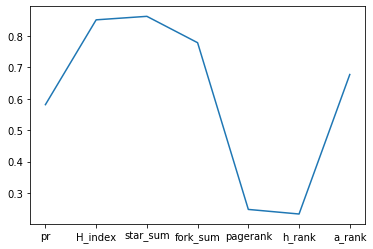

In [247]:
import matplotlib.pyplot as plt

x = ['pr', 'H_index', 'star_sum', 'fork_sum', 'pagerank', 'h_rank', 'a_rank']
plt.plot(x, corr_list)
plt.show()

In [246]:
rank_data.iloc[rank_data['score'].argsort()[::-1]]

,actor_id,pr_rank,H_index_rank,star_sum_rank,fork_sum_rank,pagerank_rank,h_rank,a_rank,score
37934,622699,6798.0,853.5,1670.0,3304.0,1728.0,168843.0,3680.0,0.953252
230822,17034772,3735.5,3812.5,17851.0,33525.5,2771.0,133774.0,6244.0,0.949540
44674,790842,2984.0,730.0,9868.0,8079.5,1416.0,196793.0,1114.0,0.944720
24344,319282,2409.0,470.0,1803.0,1851.0,2089.0,221107.0,7658.0,0.940616
28053,399535,41202.0,14887.0,8073.0,2245.0,2435.0,179766.0,4194.0,0.936760
...,...,...,...,...,...,...,...,...,...
394774,47832505,459380.0,430936.0,430936.0,431050.0,313187.5,570316.0,569459.0,0.198186
436866,56592983,459380.0,430936.0,430936.0,431050.0,313187.5,570216.0,570069.0,0.198059
468036,63106269,459380.0,430936.0,430936.0,431050.0,313187.5,570499.0,570512.0,0.197877
402749,49319156,459380.0,430936.0,430936.0,431050.0,313187.5,570872.5,570648.5,0.197750


In [2]:
from select import select
from odps import ODPS
from odps import options
from odps.df import DataFrame
import pandas as pd
import numpy as np
import re
import math
from collections import Counter
from collections import defaultdict

ACCESS_ID = 'LTAI5t9uwJrh5eJ7Q5E37D1s'
SECRET_ACCESS_KEY = 'NCFHOAnvqfnTrpypgR4b3cNawP8fnB'
ODPS_PROJECT = 'OpenDigger_prod_dev'
ODPS_ENDPOINT = 'http://service.cn-shanghai.maxcompute.aliyun.com/api'
# ACCESS_ID = 'LTAI5tSjrYp6JDW2bbiTdegU'
# SECRET_ACCESS_KEY = 'OE6JbSqOZUey5fzr9Wg6fuYYKvslZx'
# 创建odps实例
o = ODPS(ACCESS_ID, SECRET_ACCESS_KEY,
         project=ODPS_PROJECT, endpoint=ODPS_ENDPOINT)
options.tunnel.limit_instance_tunnel = False
# options.read_timeout = 3600000

In [17]:
def exe_sql(sql):
    data = []
    with o.execute_sql(sql).open_reader() as reader:

        d = defaultdict(list)  
        for record in reader:
            for res in record:
                d[res[0]].append(res[1])  

        data = pd.DataFrame.from_dict(d,orient='index').T 
    return data
# rdata =  exe_sql("SELECT repo_name FROM dim_github_repo WHERE repo_id = 191051391;")
# rdata = exe_sql("SELECT login FROM ods_github_users WHERE database_id = 41898282;")
rdata = exe_sql("SELECT actor_login FROM dim_github_actor WHERE actor_id = 27856297;")

In [18]:
rdata

,actor_login
0,dependabot-preview[bot]
